In [6]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import cross_validate,KFold, RandomizedSearchCV
from sklearn.model_selection import train_test_split
import seaborn as sns
from math import pi
import matplotlib.pyplot as plt
import random
%matplotlib inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate,KFold, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

train_labels = pd.read_csv('Archivos de datos/train_labels.csv', encoding='latin-1')
train = pd.read_csv('Archivos de datos/Create_features_train.csv', encoding='latin-1')

X=train
X['building_id'] = 0;
y=train_labels['damage_grade'].astype(int)

In [8]:
%%time
##aca tenes el modelo con los mejores parametros
clf=XGBClassifier(n_estimators= 500, max_depth= 20,learning_rate= 0.03, colsample_bytree= 0.5, gamma= 1.5, min_child_weight= 1, reg_lambda= 1, subsample= 0.4)
clf.fit(X,y)

[17:45:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 8min 52s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.4,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [9]:
##aca lees y haces la predicion y te la guardas para subirla
X_test=pd.read_csv('Archivos de datos/Create_features_test.csv')
prediction=clf.predict(X_test)
result=pd.DataFrame(prediction)
result['building_id']=X_test['building_id']
result.rename(columns={0:'damage_grade'},inplace=True)
result=result[['building_id','damage_grade']]
result.to_csv('Archivos de datos/prueba_features.csv',index=False)

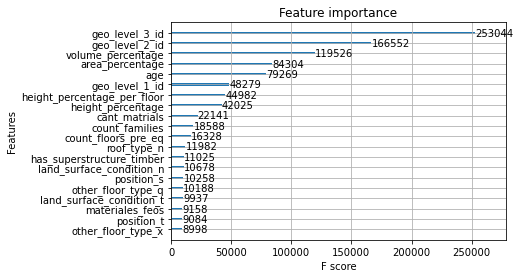

In [10]:
##y aca para ver la importancia de los features
from xgboost import plot_importance
from matplotlib import pyplot
from numpy import loadtxt
plot_importance(clf, max_num_features=20)
pyplot.show()